Привет, меня зовут Артем Носенко и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев.
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».


Уважаемый ревьюер! К сожалению я совсем запутался на этапе с построением признаков, ранжированием и оцениванием, метрики получились просто отвратительные...Поэтому прошу указать мне на ошибки и отправить на доработку. Заранее спасибо!

# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import warnings
import scipy
import sklearn.preprocessing
import pickle

warnings.filterwarnings('ignore')

load_dotenv()

# Настройка стиля
sns.set(style="whitegrid")

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Импорты сделаны, отлично!
</div>


<div class="alert alert-warning">

⚠️ `SEED` стоит зафиксировать в самом начале. Это позволит тебе добиваться воспроизводимости результатов. 

</div>

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [2]:
# !wget https://storage.yandexcloud.net/mle-data/ym/tracks.parquet

# !wget https://storage.yandexcloud.net/mle-data/ym/catalog_names.parquet

# !wget https://storage.yandexcloud.net/mle-data/ym/interactions.parquet

In [2]:
tracks = pd.read_parquet('tracks.parquet')
catalog_names = pd.read_parquet('catalog_names.parquet')
interactions = pd.read_parquet('interactions.parquet')

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [5]:
tracks.head()

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]


In [6]:
# Преобразуем списки в кортежи
tracks['albums'] = tracks['albums'].apply(tuple)
tracks['artists'] = tracks['artists'].apply(tuple)
tracks['genres'] = tracks['genres'].apply(tuple)

In [7]:
catalog_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [8]:
catalog_names.head()

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack


In [9]:
catalog_names.type.value_counts()

type
track     1000000
album      658724
artist     153581
genre         166
Name: count, dtype: int64

In [10]:
# catalog_names.rename(columns={'id': 'track_id'}, inplace=True)

In [11]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


Приведем все идентификаторы к строковому типу данных

In [12]:
# # Приведение типов данных
# tracks['track_id'] = tracks['track_id'].astype(str)
# catalog_names['track_id'] = catalog_names['track_id'].astype(str)
# interactions['track_id'] = interactions['track_id'].astype(str)
# interactions['user_id'] = interactions['user_id'].astype(str)

Тут падало ядро каждый раз, поэтому отказался от этой идеи.

In [13]:
# Проверка дубликатов
print(f"Дубликаты в tracks: {tracks.duplicated().sum()}")
print(f"Дубликаты в catalog_names: {catalog_names.duplicated().sum()}")
# print(f"Дубликаты в interactions: {interactions.duplicated().sum()}")

Дубликаты в tracks: 0
Дубликаты в catalog_names: 0


Тут interactions тоже проверялось через раз

In [14]:
# Проверка пустых
print(f"Пустые в tracks: {tracks.isna().sum()}")
print(f"Пустые в catalog_names: {catalog_names.isna().sum()}")

Пустые в tracks: track_id    0
albums      0
artists     0
genres      0
dtype: int64
Пустые в catalog_names: id      0
type    0
name    0
dtype: int64


# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

С данными проблем нет. Все типы правильные, пропуски отсутствуют

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Отлично!
</div>


<div class="alert alert-warning">

⚠️ Возможно стоит изменить некоторые типы данных: например, `int32` поменять на `int16`. 
    Таким образом ты сэкономишь память.
    Также стоит обратить внимание на возможные дубли в столбце `catalog_names`.

</div>

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

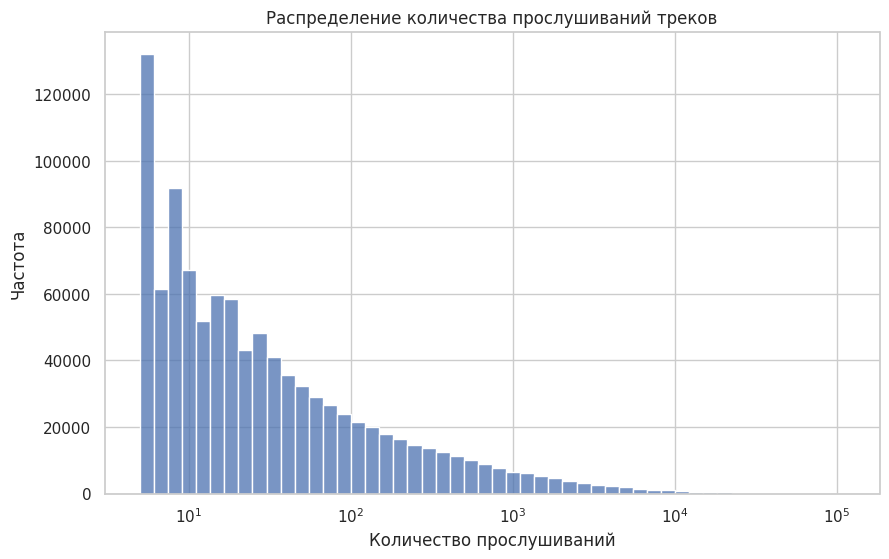

In [20]:
# Группировка по track_id для подсчета количества прослушиваний
track_listen_counts = interactions.groupby('track_id').size().reset_index(name='listen_count')

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.histplot(track_listen_counts['listen_count'], bins=50, log_scale=True)
plt.title('Распределение количества прослушиваний треков')
plt.xlabel('Количество прослушиваний')
plt.ylabel('Частота')
plt.show()

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Отличная визуализация!
</div>

Наиболее популярные треки

In [21]:
# Объединяем данные о треках и количестве прослушиваний
tracks_with_listen_counts = tracks.merge(
    track_listen_counts,
    left_on='track_id',
    right_on='track_id',
    how='left'
)

# Добавляем названия треков из catalog_names
tracks_with_names = tracks_with_listen_counts.merge(
    catalog_names[catalog_names['type'] == 'track'],
    left_on='track_id',
    right_on='id',
    how='left'
)

# Топ-10 самых популярных треков
top_tracks = tracks_with_names.sort_values(by='listen_count', ascending=False).head(10)
top_tracks[['track_id', 'name', 'listen_count']]

,track_id,name,listen_count
9098,53404,Smells Like Teen Spirit,111062
483876,33311009,Believer,106921
26665,178529,Numb,101924
512157,35505245,I Got Love,99490
829320,65851540,Юность,86670
368072,24692821,Way Down We Go,86246
475289,32947997,Shape of You,85886
696106,51241318,In The End,85244
90461,795836,Shape Of My Heart,85042
647237,45499814,Life,84748


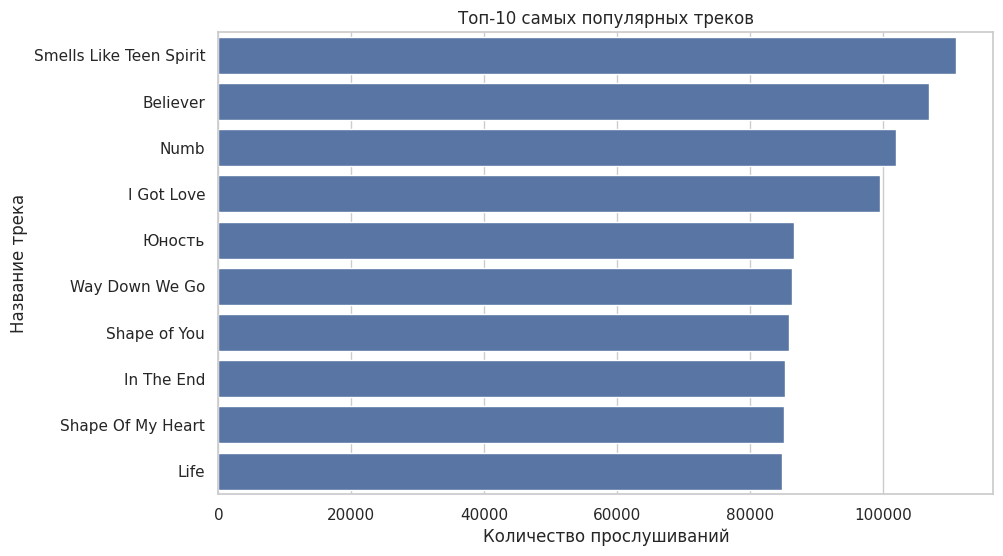

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_tracks, x='listen_count', y='name', orient='h')
plt.title('Топ-10 самых популярных треков')
plt.xlabel('Количество прослушиваний')
plt.ylabel('Название трека')
plt.show()

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Выглядит логично!
</div>

Наиболее популярные жанры

In [23]:
# Разворачиваем список жанров для каждого трека
tracks_exploded = tracks.explode('genres')

# Объединяем с данными о прослушиваниях
tracks_with_genres = tracks_exploded.merge(
    track_listen_counts,
    left_on='track_id',
    right_on='track_id',
    how='left'
)

# Группируем по жанрам и суммируем количество прослушиваний
genre_popularity = tracks_with_genres.groupby('genres')['listen_count'].sum().reset_index()

# Добавляем названия жанров из catalog_names
genre_popularity_with_names = genre_popularity.merge(
    catalog_names[catalog_names['type'] == 'genre'],
    left_on='genres',
    right_on='id',
    how='left'
)

# Топ-10 самых популярных жанров
top_genres = genre_popularity_with_names.sort_values(by='listen_count', ascending=False).head(10)
top_genres[['genres', 'name', 'listen_count']]

,genres,name,listen_count
10,11,pop,55578312
70,75,rap,37799821
95,102,allrock,31092013
19,20,ruspop,26626241
2,3,rusrap,25303695
63,68,electronics,20120981
15,16,dance,16291557
1,2,rusrock,13166147
13,14,rock,12772644
42,47,metal,12437375


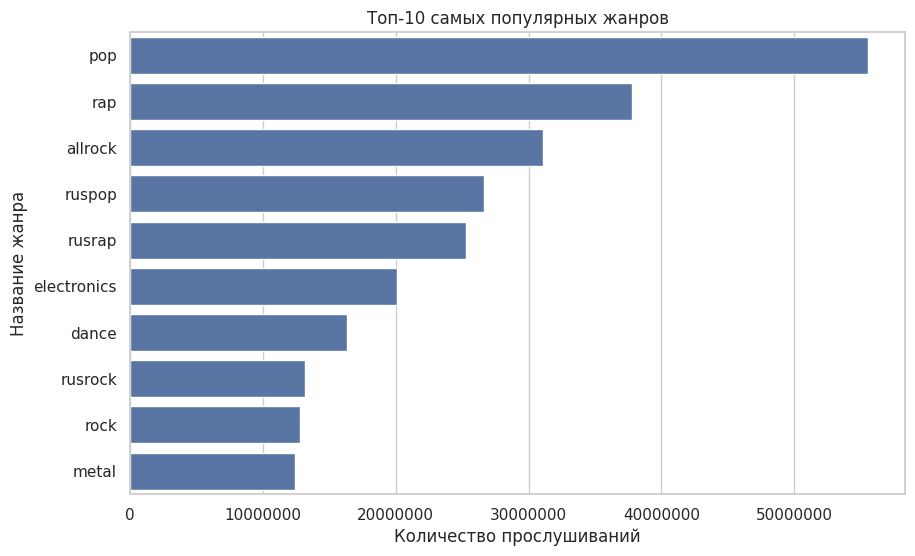

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres, x='listen_count', y='name')
plt.title('Топ-10 самых популярных жанров')
plt.xlabel('Количество прослушиваний')
plt.ylabel('Название жанра')
# Форматирование оси X
plt.ticklabel_format(style='plain', axis='x')  # Отключаем научную нотацию
plt.show()

Треки, которые никто не прослушал

In [25]:
# Треки, которые не были прослушаны
unlistened_tracks = tracks[~tracks['track_id'].isin(interactions['track_id'])]

# Добавляем названия треков из catalog_names
unlistened_tracks_with_names = unlistened_tracks.merge(
    catalog_names[catalog_names['type'] == 'track'],
    left_on='track_id',
    right_on='id',
    how='left'
)

print(f"Количество непрослушанных треков: {len(unlistened_tracks_with_names)}")

Количество непрослушанных треков: 0


# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [3]:
# Создаем словари для быстрого поиска названий
def create_name_dict(catalog, id_type):
    """
    Создает словарь для быстрого поиска названий по идентификаторам.
    
    :param catalog: DataFrame с названиями (catalog_names).
    :param id_type: Тип идентификатора ('album', 'artist', 'genre').
    :return: Словарь {id: name}.
    """
    return catalog[catalog['type'] == id_type].set_index('id')['name'].to_dict()

# Создаем словари для альбомов, исполнителей и жанров
album_name_dict = create_name_dict(catalog_names, 'album')
artist_name_dict = create_name_dict(catalog_names, 'artist')
genre_name_dict = create_name_dict(catalog_names, 'genre')

In [4]:
# Добавляем названия треков
track_name_dict = create_name_dict(catalog_names, 'track')
tracks['track_name'] = tracks['track_id'].map(track_name_dict)

In [5]:
# Добавляем названия альбомов
tracks['albums'] = tracks['albums'].apply(
    lambda x: list([album_name_dict.get(album_id, 'Unknown') for album_id in x])
)

In [6]:
# Добавляем названия исполнителей
tracks['artists'] = tracks['artists'].apply(
    lambda x: [artist_name_dict.get(artist_id, 'Unknown') for artist_id in x]
)

In [7]:
# Добавляем названия жанров
tracks['genres'] = tracks['genres'].apply(
    lambda x: [genre_name_dict.get(genre_id, 'Unknown') for genre_id in x]
)

In [8]:
tracks.head()

,track_id,albums,artists,genres,track_name
0,26,"[Taller Children, Taller Children]",[Elizabeth & the Catapult],"[pop, folk]",Complimentary Me
1,38,"[Taller Children, Taller Children]",[Elizabeth & the Catapult],"[pop, folk]",Momma's Boy
2,135,"[Wild Young Hearts, Wild Young Hearts, Wild Yo...",[Noisettes],[pop],Atticus
3,136,"[Wild Young Hearts, Wild Young Hearts, Wild Yo...",[Noisettes],[pop],24 Hours
4,138,"[Wild Young Hearts, Wild Young Hearts, Don't U...",[Noisettes],[pop],Don't Upset The Rhythm (Go Baby Go)


In [9]:
tracks.to_parquet('items.parquet')

In [10]:
interactions.to_parquet('events.parquet')

In [11]:
del tracks
del catalog_names
del interactions

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

Как только не пробовал загрузить всё в s3 через код, не получалось, поэтому сделал по документации yandexcloud и положил из коммандной строки:

> aws --endpoint-url https://storage.yandexcloud.net s3 cp items.parquet s3://s3-student-mle-20240920-1460ff9140/recsys/data/items.parquet
 
> aws --endpoint-url https://storage.yandexcloud.net s3 cp events.parquet s3://s3-student-mle-
20240920-1460ff9140/recsys/data/events.parquet

Уважаемый ревьюер, если подскажешь как загружать файлы через код, то буду очень благодарен.

Еще хотел бы узнать, вот я добавил в aws/config endpoint-url, но если явно не указывать флаг, то он все равно пытается подключиться к серверам amazon.

Как это пофиксить?

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Ниже привожу код с вариантами загрузки данных.
</div>

При возникновении проблем с платформой можно направлять их в технический саппорт курса. Это можно делать через куратора курса.

## Использование хранилища `dvc`
Все посчитанные данные и промежуточные значения расчетов сохраняются в хранилище `dvc`. Для использования хранилища `dvc` необходимо добавить файл `config.loval` со своими доступами:
```toml
['remote "my_storage"']
    access_key_id = <your-access-key-id>
    secret_access_key = <your-secret-access-key>
```

## В какой-то момент хранилище boto у меня перестало работать
На этот случай можно переносить данные по `ssh`:
```bash
# Копируем данные с виртуальной машины в локальный каталог
scripts/ssh_copy.sh --from "/home/mle-user/mle_projects/mle-project-sprint-4-v001/data" <локальный/каталог>
# Копируем данные из локального каталога в хранилище
scripts/ssh_copy.sh --to <локальный/каталог> "/home/mle-user/mle_projects/mle-project-sprint-4-v001/data"
```

## Другой вариант: командный интерфейс `awscli`

1. Устанавливаем `awscli`
```bash
sudo apt get install awscli
cat<<EOF[yandex_cloud] >> ~/.aws/credentials
[yandex_cloud]
aws_access_key_id=<your-access-key-id>
aws_secret_access_key=<your-secret-access-key>

EOF
```

2. Переносим данные из каталога data в облако
```bash
# Переносим данные из каталога data в облако
aws --endpoint-url https://storage.yandexcloud.net --profile yandex_cloud s3 sync data s3://s3-student-mle-20240919-daec520330/recsys/data
# Берем свежие данные из облака в data
aws --endpoint-url https://storage.yandexcloud.net --profile yandex_cloud s3 sync s3://s3-student-mle-20240919-daec520330/recsys/data data
```

3. Переносим данные из каталога recommendations в облако
```bash
# Переносим данные из каталога recommendations в облако
aws --endpoint-url https://storage.yandexcloud.net --profile yandex_cloud s3 sync recommendations s3://s3-student-mle-20240919-daec520330/recsys/recommendations
# Берем свежие данные из облака в recommendations
aws --endpoint-url https://storage.yandexcloud.net --profile yandex_cloud s3 sync s3://s3-student-mle-20240919-daec520330/recsys/recommendations recommendations
```

4. Если запускать ноутбук из корневой директории проекта, то можно использовать следующий скрипт:
```bash
scripts/sync_data.sh "->" # Синхронизуем данные с локального каталога в хранилище
scripts/sync_data.sh "<-" # Синхронизуем данные с хранилища в локальный каталог
```


In [4]:
# !pip install --upgrade boto3 pyarrow

In [5]:
# !pip install boto3==1.35.93

In [6]:
# !pip install aiobotocore==2.15.2

In [1]:
# import s3fs
# import pandas as pd

# # Загрузка переменных окружения
# load_dotenv()

# fs = s3fs.S3FileSystem(
#     key=os.getenv("AWS_ACCESS_KEY_ID"),
#     secret=os.getenv("AWS_SECRET_ACCESS_KEY"),
#     endpoint_url=os.getenv("AWS_ENDPOINT_URL")
# )

# # Запись данных
# with fs.open(f"s3://{os.getenv('S3_BUCKET_NAME')}/recsys/data/items.parquet", 'wb') as f:
#     items.to_parquet(f, engine="pyarrow")

# with fs.open(f"s3://{os.getenv('S3_BUCKET_NAME')}/recsys/data/events.parquet", 'wb') as f:
#     events.to_parquet(f, engine="pyarrow")

In [2]:
# import os
# import boto3

# load_dotenv()

# S3_BUCKET = os.getenv("S3_BUCKET_NAME")
# STORAGE_OPTIONS={
#     "endpoint_url": os.getenv("AWS_ENDPOINT_URL"), 
#     "key": os.getenv("AWS_ACCESS_KEY_ID"), 
#     "secret": os.getenv("AWS_SECRET_ACCESS_KEY"),
#     "client_kwargs":{"region_name": os.getenv("AWS_REGION")},
#     "config_kwargs": {"signature_version": "s3v4"}
# }

# items.to_parquet(
#     f"s3://{S3_BUCKET}/recsys/data/items.parquet", 
#     engine="pyarrow", storage_options=STORAGE_OPTIONS
# )
# events.to_parquet(
#     f"s3://{S3_BUCKET}/recsys/data/events.parquet",
#     engine="pyarrow", storage_options=STORAGE_OPTIONS
# )

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [12]:
# events = pd.read_parquet('events.parquet').rename(columns={'track_id': 'item_id'})
# items = pd.read_parquet('items.parquet').rename(columns={'track_id': 'item_id'})

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [ ]:
cutoff_date = pd.Timestamp('2022-12-06')

mask = events['started_at'] < cutoff_date

train = events[mask]

test = events[~mask]

del events

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Отлично, выборки train / test сформированы. 

Выборки train / test можно получать несколькими способами (см. картинку ниже)
</div>

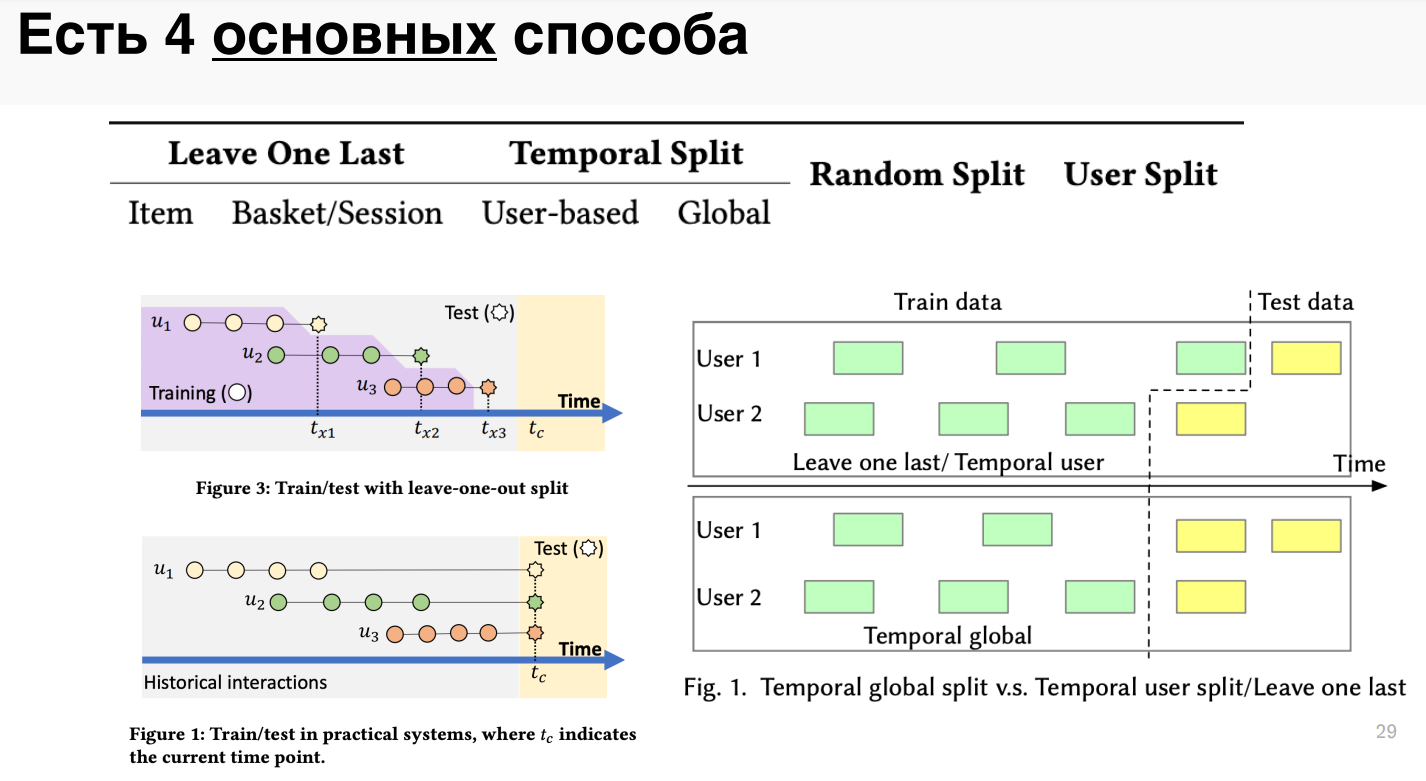

[Ссылка на картинку](https://disk.yandex.ru/i/L6hBTf6KLYRa-g)

# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [18]:
# train.to_parquet('events_train.parquet')
# test.to_parquet('events_test.parquet')

In [19]:
del train
del test

In [20]:
# items = pd.read_parquet('items.parquet').rename(columns={'track_id': 'item_id'})

In [21]:
events_train = pd.read_parquet('events_train.parquet')
events_test = pd.read_parquet('events_test.parquet')

In [22]:
item_popularity = events_train \
                  .groupby(['item_id']).agg(users=("user_id", "nunique")).reset_index()

In [23]:
# Переименовываем столбец 'users' в 'popularity'
item_popularity.rename(columns={"users": "popularity"}, inplace=True)

# Добавляем столбец popularity в events_train через merge
events_train = events_train.merge(item_popularity, on="item_id", how="left")

In [24]:
item_popularity = item_popularity.sort_values(by='popularity', ascending=False)

In [25]:
def top_k_items(k):
    return item_popularity.merge(items.set_index("item_id")[['track_name', 'artists']], on="item_id", how='left')

In [26]:
top_k_items(10)

,item_id,popularity,track_name,artists
0,53404,108542,Smells Like Teen Spirit,[Nirvana]
1,178529,99328,Numb,[Linkin Park]
2,33311009,96043,Believer,[Imagine Dragons]
3,35505245,91848,I Got Love,"[Miyagi & Эндшпиль, Рем Дигга]"
4,795836,82129,Shape Of My Heart,[Sting]
...,...,...,...,...
998593,77825883,1,Tides,[Men I Trust]
998594,85925524,1,Beggin Tik Tok,[Challenge Tendencia]
998595,85931306,1,If That Ain't A Reason,[Joanne Shaw Taylor]
998596,85932038,1,Rain Fire,"[Ivy Lab, Onoe Caponoe]"


In [27]:
item_popularity.to_parquet('top_popular.parquet')

In [28]:
del item_popularity

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Отлично, неперсональные рекомендации сформированы!
</div>

<div class="alert alert-warning">
⚠️ На подумать: возможно стоило посчитать метрики только на "холодных" юзерах. Ведь для них в первую очередь будут рекомендоваться топ-популярных.
</div>

# Персональные

Рассчитаем персональные рекомендации.

In [29]:
# Рассчитаем разреженность нашей матрицы взаимодействий
events = pd.read_parquet('events.parquet')
# num_users = events['user_id'].nunique()
# num_items = events['track_id'].nunique()

# # Всего ячеек
# total_cells = num_users * num_items
# # Заполненных
# filled_cells = len(events)
# # Пустых
# empty_cells = total_cells - filled_cells
# # Разреженность
# sparsity = empty_cells / total_cells

# print(f'Sparsity: {sparsity}')

Sparsity: 0.9998378775899873

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Выглядит похожим на правду.
</div>

In [30]:
# Перекодируем идентификаторы пользователей в последовательность
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events['user_id'])

events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# Перекодируем идентификаторы треков
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items['item_id'])

items["item_id_enc"] = item_encoder.transform(items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

In [31]:
with open('user_encoder.pkl', 'wb') as f:
    pickle.dump(user_encoder, f)
with open('item_encoder.pkl', 'wb') as f:
    pickle.dump(item_encoder, f)

events_train.to_parquet('events_train_enc.parquet')
events_test.to_parquet('events_test_enc.parquet')

In [32]:
del events
del items

In [20]:
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train["track_seq"],
    (events_train['user_id_enc'], events_train['item_id_enc'])),
    dtype=np.int8)

In [21]:
# scipy.sparse.save_npz("user_item_matrix_train.npz", user_item_matrix_train)

In [22]:
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=10, iterations=10, regularization=0.05, random_state=42)
als_model.fit(user_item_matrix_train)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [05:29<00:00, 32.94s/it]


In [4]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

In [6]:
# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=20)

In [7]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

In [9]:
# Сохраним...
np.save('item_ids_enc.npy', item_ids_enc)

In [8]:
als_recommendations_1 = als_recommendations[["user_id", "item_id", "score"]]
als_recommendations_1.to_parquet("personal_als.parquet")

In [25]:
# # Сохраняем модель в файл
# with open("als_model.pkl", "wb") as f:
#     pickle.dump(als_model, f)

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Отлично, персональные рекомендации сформированы!
</div>

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [5]:
with open("als_model.pkl", "rb") as f:
    als_model = pickle.load(f)
user_item_matrix_train = scipy.sparse.load_npz("user_item_matrix_train.npz")

In [40]:
events_train_enc = pd.read_parquet("events_train_enc.parquet")

In [24]:
# # Получим закодированные идентификаторы всех обьектов, известных из обучаюищей выборки
# train_items_ids_enc = events_train["item_id_enc"].unique()
# # Порог количества похожих айтемов
# max_similar_items = 5
# # Получаем списки похожих объектов, используя ранее полученную ALS-модель
# similar_items = als_model.similar_items(train_items_ids_enc, N=max_similar_items+1)

# sim_item_item_ids_enc = similar_items[0]  # Идентификаторы похожих объектов
# sim_item_scores = similar_items[1]

# np.savez("similar_items.npz", item_ids=sim_item_item_ids_enc, scores=sim_item_scores)

In [36]:
with np.load('similar_items.npz') as data:
    sim_item_item_ids_enc = data['item_ids']
    sim_item_scores = data['scores']

In [3]:
with open('item_encoder.pkl', 'rb') as f:
    item_encoder = pickle.load(f)
with open('user_encoder.pkl', 'rb') as f:
    user_encoder = pickle.load(f)

In [41]:
train_items_ids_enc = events_train_enc["item_id_enc"].unique()

similar_items = pd.DataFrame({
    "item_id_enc": train_items_ids_enc,
    "sim_item_id_enc": sim_item_item_ids_enc.tolist(),
    "score": sim_item_scores.tolist()})

similar_items = similar_items.explode(["sim_item_id_enc", "score"], ignore_index=True)

# Приведем типы данных
similar_items["sim_item_id_enc"] = similar_items["sim_item_id_enc"].astype('int')
similar_items["score"] = similar_items["score"].astype('float')

similar_items["item_id_1"] = item_encoder.inverse_transform(similar_items['item_id_enc'])
similar_items["item_id_2"] = item_encoder.inverse_transform(similar_items['sim_item_id_enc'])

similar_items = similar_items.drop(columns=['item_id_enc', 'sim_item_id_enc'])

similar_items = similar_items.query("item_id_1 != item_id_2")

In [42]:
similar_items.to_parquet("similar_items.parquet")

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Похожие треки сформированы.
</div>

<div class="alert alert-warning">
⚠️ Было бы полезно проверить "похожесть" треки на нескольких примерах, визуализировав их.

# Построение признаков

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Отлично! Для построения признаков и обучения ранжирующей модели стоит использовать двухстадийный подход (см. картинку ниже)
</div>

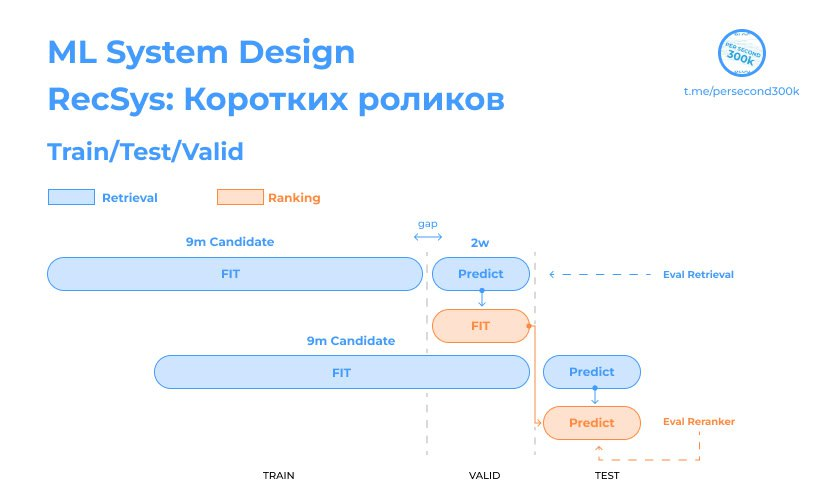

[Ссылка](https://disk.yandex.ru/i/OmvEZsAn9PakDQ)

Построим три признака, можно больше, для ранжирующей модели.

In [2]:
top_popular = pd.read_parquet('top_popular.parquet')
personal_als = pd.read_parquet('personal_als.parquet')
similar_items = pd.read_parquet('similar_items.parquet')

In [3]:
events_train = pd.read_parquet('events_train.parquet')
events_test = pd.read_parquet('events_test.parquet')

In [8]:
events_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25251127 entries, 31 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   item_id     int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 626.1 MB


In [6]:
# !pip install lightgbm

In [7]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [2]:
events_train = pd.read_parquet('events_train.parquet')

In [3]:
# Создаем таблицу взаимодействий user-item
interactions = events_train[["user_id", "item_id"]].drop_duplicates()
interactions["target"] = 1  # Пользователь взаимодействовал с треком

In [4]:
del events_train

In [5]:
personal_als = pd.read_parquet('personal_als.parquet')

In [6]:
# Добавляем негативные примеры (отсутствие взаимодействия)
# Для этого создаем все возможные пары user-item из personal_als
all_pairs = personal_als[["user_id", "item_id"]].drop_duplicates()

In [7]:
del personal_als

In [8]:
# Оптимизация типов данных
all_pairs["user_id"] = all_pairs["user_id"].astype("int32")
all_pairs["item_id"] = all_pairs["item_id"].astype("int32")
interactions["user_id"] = interactions["user_id"].astype("int32")
interactions["item_id"] = interactions["item_id"].astype("int32")

# Удаляем дубликаты
all_pairs = all_pairs.drop_duplicates(subset=["user_id", "item_id"])
interactions = interactions.drop_duplicates(subset=["user_id", "item_id"])

# Устанавливаем индексы
all_pairs.set_index(["user_id", "item_id"], inplace=True)
interactions.set_index(["user_id", "item_id"], inplace=True)

In [10]:
# Выполняем объединение
all_pairs = all_pairs.join(interactions["target"], how="left")
all_pairs.reset_index(inplace=True)

In [11]:
del interactions

In [12]:
# Заполняем пропущенные значения
all_pairs["target"].fillna(0, inplace=True)

In [13]:
all_pairs.to_parquet('all_pairs_processed.parquet')

In [14]:
top_popular = pd.read_parquet('top_popular.parquet')
personal_als = pd.read_parquet('personal_als.parquet')

In [15]:
# Добавляем популярность треков
data = all_pairs.merge(top_popular, on="item_id", how="left")

# Добавляем персональные рекомендации ALS
data = data.merge(personal_als, on=["user_id", "item_id"], how="left")

In [16]:
del personal_als
del top_popular

In [18]:
similar_items = pd.read_parquet('similar_items.parquet')

In [19]:
# Добавляем информацию о похожести треков
similarity_scores = similar_items.groupby("item_id_1")["score"].mean().reset_index()
similarity_scores.rename(columns={"item_id_1": "item_id", "score": "similarity_score"}, inplace=True)
data = data.merge(similarity_scores, on="item_id", how="left")

In [20]:
# Заполняем пропущенные значения нулями
data.fillna(0, inplace=True)

In [21]:
data.to_parquet('data.parquet')

In [2]:
data = pd.read_parquet('data.parquet')

# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [8]:
# 4. Выбор признаков
features = ["popularity", "score", "similarity_score"]
X = data[features]
y = data["target"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Датасеты для обучения ранжирующей модели сформированы.
</div>

<div class="alert alert-warning">
⚠️ Какое соотношение 0 и 1 у тебя получилось?

In [24]:
params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "learning_rate": 0.1,
    "max_depth": -1,
    "feature_fraction": 0.8,  # Использование 80% признаков
    "bagging_fraction": 0.8,  # Использование 80% данных
    "verbose": -1
}

In [25]:
# Обучение модели
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=50
)

In [26]:
# Предсказание релевантности
data["predicted_relevance"] = model.predict(X)
ranked_recommendations = data.sort_values(by=["user_id", "predicted_relevance"], ascending=[True, False])

In [27]:
ranked_recommendations.to_parquet("recommendations.parquet")

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [2]:
recommendations = pd.read_parquet('recommendations.parquet')
catalog_names = pd.read_parquet('catalog_names.parquet')

In [3]:
# Добавляем названия товаров к recommendations
recommendations = recommendations.merge(catalog_names, left_on='item_id', right_on='id', how='left')

In [4]:
recommendations = recommendations.drop(['id', 'type'], axis=1)

In [5]:
events_test = pd.read_parquet('events_test.parquet')

In [47]:
recommendations_grouped = recommendations.groupby('user_id')['item_id'].apply(list).to_dict()

In [48]:
ground_truth_grouped = events_test.groupby('user_id')['item_id'].apply(set).to_dict()

In [55]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def precision_recall_at_k(recommendations, recommendations_grouped, ground_truth, k=10):
    """Возвращает precision и recall на топ-k рекомендациях"""
    precision, recall = [], []

    # Используем tqdm для отображения прогресс-бара
    for user_id in recommendations['user_id'].unique():
        rec_items = recommendations_grouped.get(user_id, [])[:k]
        true_items = ground_truth_grouped.get(user_id, set())
        
        if true_items:
            hits = len(set(rec_items) & true_items)
            precision.append(hits / k)
            recall.append(hits / len(true_items))

    return np.mean(precision), np.mean(recall)

def coverage(recommendations, all_items):
    """Покрытие — процент уникальных треков в рекомендациях"""
    recommended_items = set(recommendations['item_id'].unique())
    return len(recommended_items) / len(all_items)

def novelty(recommendations, popularity_rank):
    """Новизна — средний ранг по популярности"""
    ranks = recommendations['popularity'].rank().values  # Используем .values для работы с массивами NumPy
    return np.mean(ranks)

In [56]:
# Метрики
precision_pop, recall_pop = precision_recall_at_k(recommendations.sort_values('popularity', ascending=False), recommendations_grouped, events_test)
precision_als, recall_als = precision_recall_at_k(recommendations.sort_values('score', ascending=False), recommendations_grouped, events_test)
precision_final, recall_final = precision_recall_at_k(recommendations.sort_values('predicted_relevance', ascending=False), recommendations_grouped, events_test)

In [57]:
coverage_pop = coverage(recommendations.sort_values('popularity', ascending=False), recommendations['item_id'].unique())
coverage_als = coverage(recommendations.sort_values('score', ascending=False), recommendations['item_id'].unique())
coverage_final = coverage(recommendations.sort_values('predicted_relevance', ascending=False), recommendations['item_id'].unique())

In [58]:
novelty_pop = novelty(recommendations.sort_values('popularity', ascending=False), recommendations['popularity'])
novelty_als = novelty(recommendations.sort_values('score', ascending=False), recommendations['popularity'])
novelty_final = novelty(recommendations.sort_values('predicted_relevance', ascending=False), recommendations['popularity'])

In [59]:
# Итоговые результаты
print(f"Популярные рекомендации: Precision={precision_pop:.4f}, Recall={recall_pop:.4f}, Coverage={coverage_pop:.4f}, Novelty={novelty_pop:.4f}")
print(f"ALS рекомендации: Precision={precision_als:.4f}, Recall={recall_als:.4f}, Coverage={coverage_als:.4f}, Novelty={novelty_als:.4f}")
print(f"Итоговые рекомендации: Precision={precision_final:.4f}, Recall={recall_final:.4f}, Coverage={coverage_final:.4f}, Novelty={novelty_final:.4f}")

Популярные рекомендации: Precision=0.0023, Recall=0.0036, Coverage=1.0000, Novelty=14621777.0000
ALS рекомендации: Precision=0.0023, Recall=0.0036, Coverage=1.0000, Novelty=14621777.0000
Итоговые рекомендации: Precision=0.0023, Recall=0.0036, Coverage=1.0000, Novelty=14621777.0000


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Метрики рассчитаны, отлично!
</div>

<div class="alert alert-block alert-danger">
❌ Метрики coverage и novelty построены не совсем корректно. Просьба их скорректировать.
</div>

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

<b>Комментарий от ревьюера v1</b>


    
# Общий вывод

<div class="alert alert-block alert-success">
    

Спасибо за работу, у тебя получился хороший проект!\
Выводы очень развернутые и верные! 
Удалось протестировать различные алгоритмы для формирования рекомендаций.  
Есть небольшие советы, просьба ознакомиться с ними. Я готов принять твой проект после исправления критических замечаний.\
Если есть вопросы или желание улучшить твой проект - оставь вопросы комментарии после этой ячейки. Постараюсь тебе помочь с ответами и улучшением твоего проекта! 
</div>

Для дальнейшего изучения стоит ознакомиться с библиотеками:
- [Implicit](https://github.com/benfred/implicit)
- [RecTools](https://github.com/MobileTeleSystems/RecTools)
- [RePlay](https://github.com/sb-ai-lab/RePlay)
- [LightFM](https://github.com/lyst/lightfm)
   
Прочитать:
- обзорную [статью](https://education.yandex.ru/handbook/ml/article/intro-recsys) и ее продолжение.
- полазить на [сайте](https://paperswithcode.com/task/recommendation-systems). Тут очень много примеров реальных рекомендательных систем с имплементацией.
- презентация про ранкер на [TF](https://bendersky.github.io/res/TF-Ranking-ICTIR-2019.pdf)


